In [1]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

import csv
import copy
import datetime

In [2]:
def str_to_datetime(timestamp):
  date_parts = timestamp.split('-')
  year, month, day = int(date_parts[0]), int(date_parts[1]), int(date_parts[2])
  return datetime.datetime(year=year, month=month, day=day)

In [18]:
rsi = pd.read_csv('data/rsi/BBAS3.SAO.SAO-RSI.csv')

rsi["time"] = rsi["time"].apply(str_to_datetime)
rsi.index = rsi.pop("time")

start_date = str_to_datetime('2022-01-01')
rsi = copy.deepcopy(rsi.iloc[rsi.index > start_date])

df = pd.read_csv('data/stock-data/BBAS3.SAO.csv')

df["timestamp"] = df["timestamp"].apply(str_to_datetime)
df.index = df.pop("timestamp")


df = copy.deepcopy(df.iloc[df.index > start_date])

df_reversed = df[::-1]
df_reversed['7_days_moving_average'] = df_reversed['close'].rolling(window=7).mean()
df_reversed['14_days_moving_average'] = df_reversed['close'].rolling(window=14).mean()
df_reversed['21_days_moving_average'] = df_reversed['close'].rolling(window=21).mean()
df_reversed['28_days_moving_average'] = df_reversed['close'].rolling(window=28).mean()
df_reversed['35_days_moving_average'] = df_reversed['close'].rolling(window=35).mean()
df_reversed['40_days_moving_average'] = df_reversed['close'].rolling(window=40).mean()
df_result = df_reversed[::-1] 

/tmp/ipykernel_5256/3892031254.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reversed['7_days_moving_average'] = df_reversed['close'].rolling(window=7).mean()
/tmp/ipykernel_5256/3892031254.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reversed['14_days_moving_average'] = df_reversed['close'].rolling(window=14).mean()
/tmp/ipykernel_5256/3892031254.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

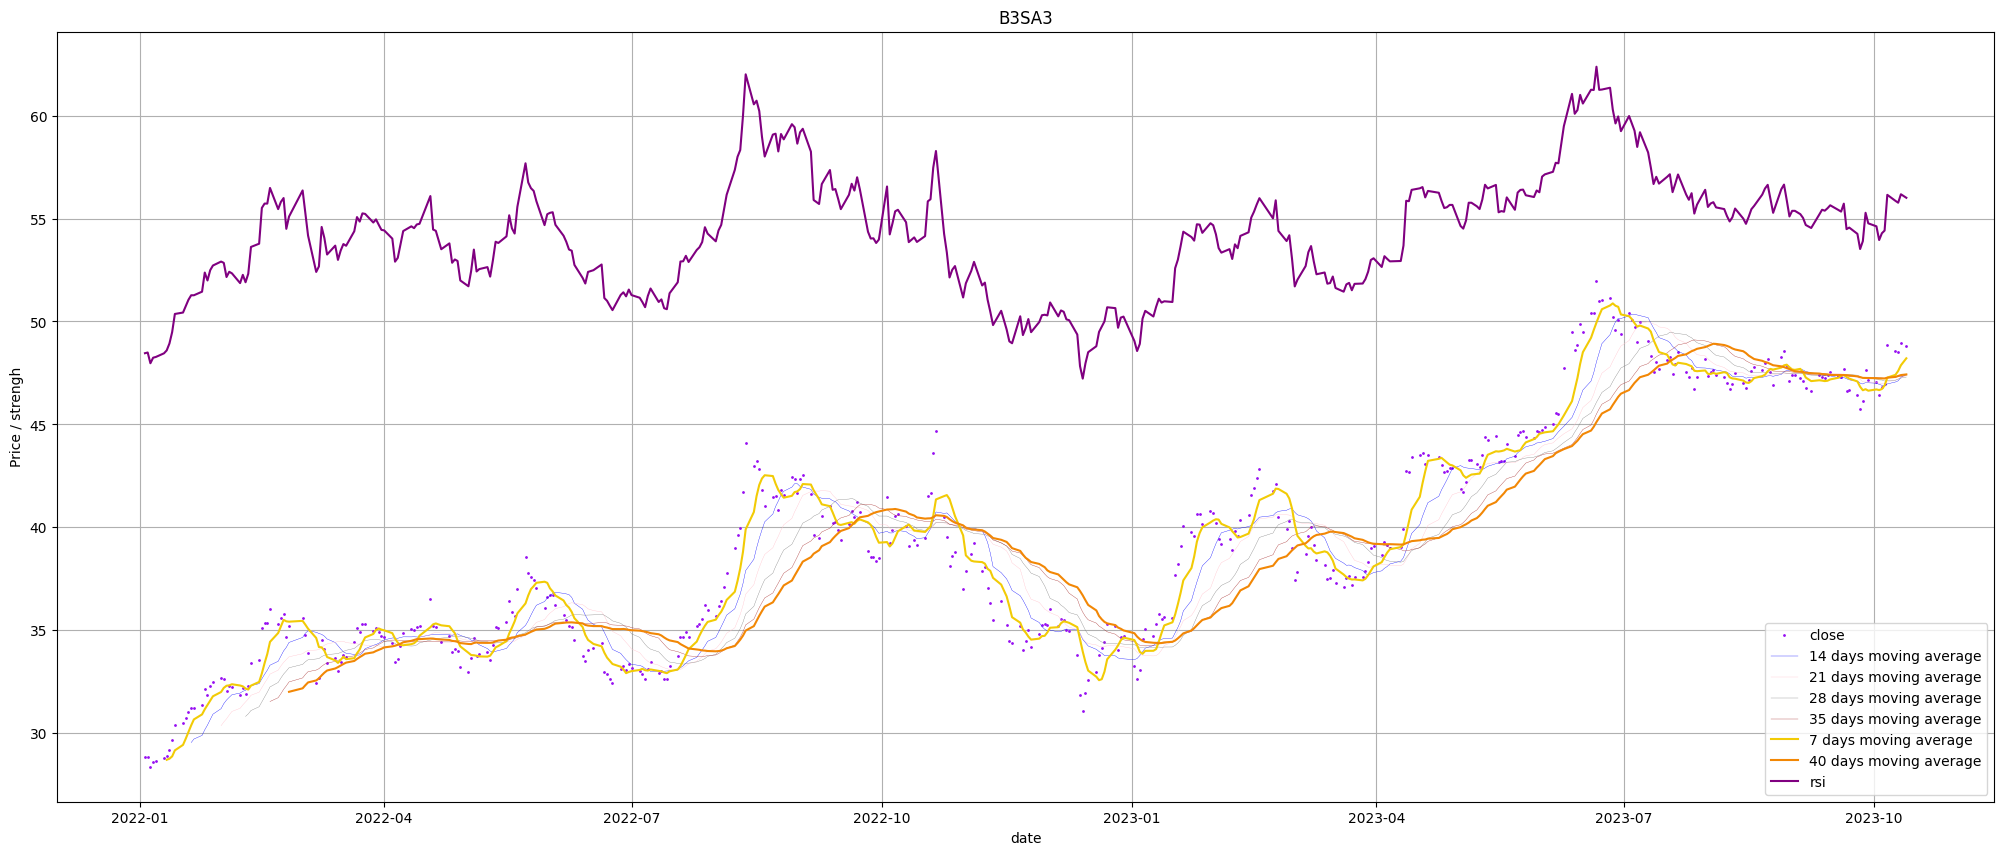

In [19]:
# Plotting a simple line graph
plt.figure(figsize=(25, 10))  # Set the figure size

plt.plot(df_result.index, df['close'], marker='o', markersize=1, linewidth=0, color='#970FF2', label='close')

plt.plot(df.index, df_result['14_days_moving_average'],  color='blue', label='14 days moving average', linewidth=0.25)
plt.plot(df.index, df_result['21_days_moving_average'],  color='pink', label='21 days moving average', linewidth=0.25)
plt.plot(df.index, df_result['28_days_moving_average'],  color='gray', label='28 days moving average', linewidth=0.25)
plt.plot(df.index, df_result['35_days_moving_average'],  color='brown', label='35 days moving average', linewidth=0.25)

plt.plot(df.index, df_result['7_days_moving_average'],  color='#F2CB05', label='7 days moving average')
plt.plot(df.index, df_result['40_days_moving_average'],  color='#F28705', label='40 days moving average')

plt.plot(rsi.index, rsi['RSI'],  color='purple', label='rsi')

# plt.scatter(sim_df[sim_df['move'] == 'buy']['date'], sim_df[sim_df['move'] == 'buy']['price'], marker='^',s=8, color='green', label='buy')
# plt.scatter(sim_df[sim_df['move'] == 'sell']['date'], sim_df[sim_df['move'] == 'sell']['price'], marker='v',s=8, color='red', label='sell')

plt.title('B3SA3')
plt.xlabel('date')
plt.ylabel('Price / strengh')
plt.legend()
# plt.xticks(np.arange('2019-11-07'))
plt.grid(True, which='both')

# Show the plot
plt.show()